In [1]:
import networkx as nx 
import matplotlib.pyplot as plt

In [58]:
# Diagrama dado

diag = [('00000','00000'),('10101','10011'),('10001','10011'),('10000','10011'),
        ('01101','01110'),('01010','01110'),('01100','01110'),('01110','01110'),
        ('01000','01100'),('01001','01000'),('10100','10111'),('10110','10111'),
        ('10010','10111'),('10111','10111'),('01011','01111'),('01111','01111'),
        ('00001','11001'),('11001','11011'),('00011','11011'),('00101','11011'),
        ('11011','00111'),('00010','00111'),('00111','11111'),('11110','00111'),
        ('11010','00111'),('00110','00111'),('11111','11111'),('11101','11010'),
        ('11000','00110'),('11100','00110'),('00100','00110'),('10011','10011')]

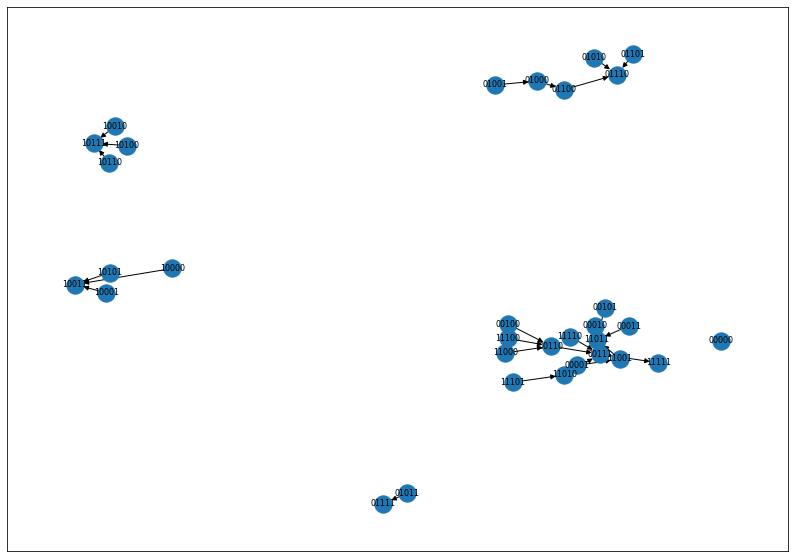

In [59]:
# Grafo do diagrama

G = nx.DiGraph()
G.add_edges_from(diag)
pos = nx.spring_layout(G)
plt.figure(3,figsize=(14,10)) 
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos,font_size=8)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

In [71]:
# Listas contendo todas as saidas e chegadas

sd = [diag[x][0] for x in range(0,len(diag))]
chd = [diag[x][1] for x in range(0,len(diag))]

In [75]:
# Funcao que calcula o valor de T(a,b) para todos os arcos
# **feita com a dica sobre recursividade ;)

def cal_T(noh):
    if noh not in chd:
        n = 1
    else:
        lista = []
        n = 0
        for i in range(0,len(chd)):
            if chd[i] == noh:
                lista.append(i)
        for item in lista:
            if sd[item] == chd[item]:
                return n
            else:
                n += calT(sd[item])

    return n 

In [97]:
# Valores de T(a,b) 

for i in range(0, len(sd)):
    print(diag[i][0], '->', diag[i][1], ':', cal_T(sd[i]))

00000 -> 00000 : 0
10101 -> 10011 : 1
10001 -> 10011 : 1
10000 -> 10011 : 1
01101 -> 01110 : 1
01010 -> 01110 : 1
01100 -> 01110 : 1
01110 -> 01110 : 3
01000 -> 01100 : 1
01001 -> 01000 : 1
10100 -> 10111 : 1
10110 -> 10111 : 1
10010 -> 10111 : 1
10111 -> 10111 : 3
01011 -> 01111 : 1
01111 -> 01111 : 1
00001 -> 11001 : 1
11001 -> 11011 : 1
00011 -> 11011 : 1
00101 -> 11011 : 1
11011 -> 00111 : 3
00010 -> 00111 : 1
00111 -> 11111 : 9
11110 -> 00111 : 1
11010 -> 00111 : 1
00110 -> 00111 : 3
11111 -> 11111 : 9
11101 -> 11010 : 1
11000 -> 00110 : 1
11100 -> 00110 : 1
00100 -> 00110 : 1
10011 -> 10011 : 3


In [106]:
# Funcao que calcula os valores de L(i)

def cal_L(noh):
    n = 1
    g = sd.index(noh)
    if diag[g][1] == noh:
        return 0
    else:
        n += cal_L(diag[g][1])
    return n

In [108]:
# Valores de L(i)

for i in sd:
    print(i, ':', cal_L(i))
        
    

0 00000
1 10101
1 10001
1 10000
1 01101
1 01010
1 01100
0 01110
2 01000
3 01001
1 10100
1 10110
1 10010
0 10111
1 01011
0 01111
4 00001
3 11001
3 00011
3 00101
2 11011
2 00010
1 00111
2 11110
2 11010
2 00110
0 11111
3 11101
3 11000
3 11100
3 00100
0 10011


In [131]:
# Funcao para criar uma lista com todos
# os valores de T(a,b) do nó até o singleton

def valores_T(noh):
    vals_T = []
    g = sd.index(noh)
    if diag[g][1] == noh:
        vals_T.append(cal_T(noh))
        return vals_T
    else:
        vals_T.append(cal_T(noh))
        vals_T += valores_T(diag[g][1])
        
    return vals_T

In [143]:
# Funcao que calcula o valor de w(i)

def cal_w(noh):
    if cal_L(noh) == 0:
        return sum(valores_T(noh)) 
    else:
        return sum(valores_T(noh))/cal_L(noh)

In [144]:
# Valores de w(i)

for i in sd:
    print(i, ':', cal_w(i))

00000 : 0
10101 : 4.0
10001 : 4.0
10000 : 4.0
01101 : 4.0
01010 : 4.0
01100 : 4.0
01110 : 3
01000 : 2.5
01001 : 2.0
10100 : 4.0
10110 : 4.0
10010 : 4.0
10111 : 3
01011 : 2.0
01111 : 1
00001 : 5.75
11001 : 7.333333333333333
00011 : 7.333333333333333
00101 : 7.333333333333333
11011 : 10.5
00010 : 9.5
00111 : 18.0
11110 : 9.5
11010 : 9.5
00110 : 10.5
11111 : 9
11101 : 6.666666666666667
11000 : 7.333333333333333
11100 : 7.333333333333333
00100 : 7.333333333333333
10011 : 3


In [145]:
# Funcao que calcula o valor da
# Convergencia total W do diagrama

def cal_tot_W(lista):
    return sum(lista)/(2**len(sd))

In [149]:
# Valor de W

valores_w = [cal_w(x) for x in sd]
cal_tot_W(valores_w)

4.3170681844155e-08